In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
import math

In [2]:
def pos_max(img, ins):
    first = img[:,:,0]
    maxindex_1 = first.argmax()
    pos_y_bregma = maxindex_1 // ins - 1
    pos_x_bregma = maxindex_1 % ins - 1
    second = img[:,:,1]
    maxindex_2 = second.argmax()
    pos_y_lambda = maxindex_2 // ins -1 
    pos_x_lambda = maxindex_2 % ins -1 
    return pos_y_bregma, pos_x_bregma, pos_y_lambda, pos_x_lambda

def pos_result(test_result, test_mask, ins):
    max_y_bregma = np.array([])
    max_x_bregma = np.array([])
    max_y_lambda = np.array([])
    max_x_lambda = np.array([])

    for out_file in os.listdir(os.path.join(test_result)):
        if out_file.endswith(".png"):
            mask_path = test_mask + out_file[:-4] + '_mask.png'
            out_path = test_result + out_file
            out = io.imread(out_path)
            mask = io.imread(mask_path)
            out_re = resize(out, (ins, ins))
            mask_re = resize(mask, (ins, ins))
            out_re_max = pos_max(out_re, ins)
            mask_re_max = pos_max(mask_re, ins)
            max_y_bregma = np.append(max_y_bregma, mask_re_max[0]-out_re_max[0])
            max_x_bregma = np.append(max_x_bregma, mask_re_max[1]-out_re_max[1])
            max_y_lambda = np.append(max_y_lambda, mask_re_max[2]-out_re_max[2])
            max_x_lambda = np.append(max_x_lambda, mask_re_max[3]-out_re_max[3])

    return  max_y_bregma, max_x_bregma, max_y_lambda, max_x_lambda


In [3]:
test_result = 'C:/Users/pzhou10/Downloads/stage2/r20/result/'
test_mask = 'C:/Users/pzhou10/Downloads/stage2/r20/test_mask_r20/'
max_y_bregma, max_x_bregma, max_y_lambda, max_x_lambda = pos_result(test_result,test_mask, 640)

bregma_error = np.array([])
lambda_error = np.array([])
for i in range(13):
    bregma_error = np.append(bregma_error, math.sqrt(abs(max_y_bregma[i])**2 + abs(max_x_bregma[i])**2))
    lambda_error = np.append(lambda_error, math.sqrt(abs(max_y_lambda[i])**2 + abs(max_x_lambda[i])**2))
print(np.mean(bregma_error), np.mean(lambda_error), max(bregma_error), max(lambda_error))

10.120866629838789 10.14594932309732 30.805843601498726 22.0


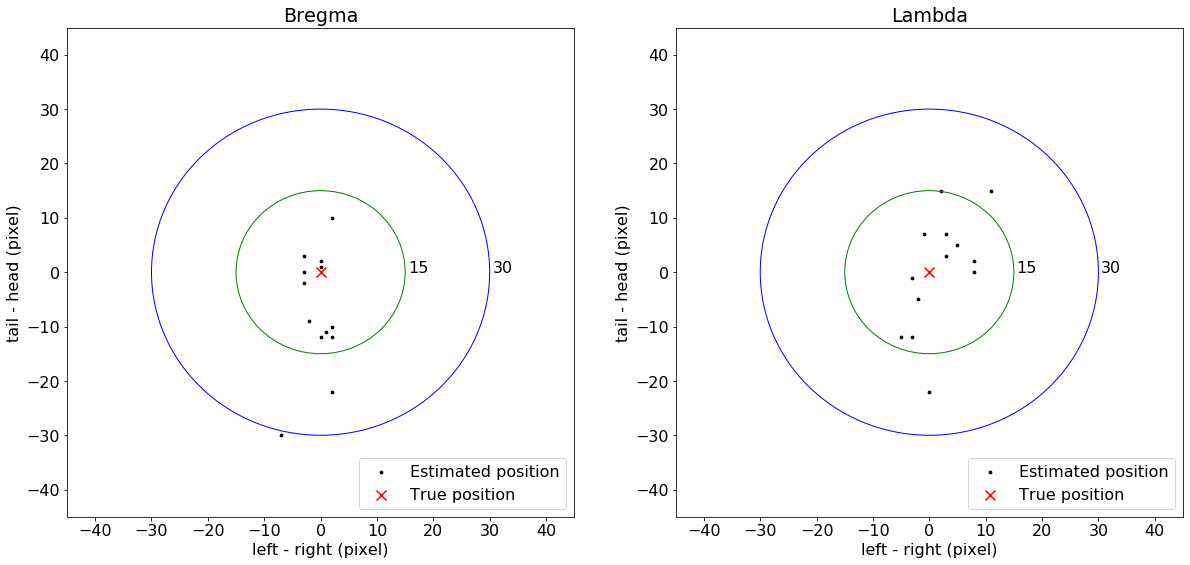

In [6]:
fs = 16
import matplotlib
matplotlib.rcParams.update({'font.size': fs})

def draw_subgraph_px(x, y, ax, title):
    circle2 = plt.Circle((0, 0), 15, color='g', fill=False)
    circle4 = plt.Circle((0, 0), 30, color='b', fill=False)

    ax.scatter(x, y,marker='.',s=30, edgecolors ='Black', color='Black', label='Estimated position')
    ax.scatter(0,0, marker='x', color='red', s=100,label='True position')

    ax.set_xlim([-45, 45])
    ax.set_ylim([-45, 45])
    #ax.add_artist(circle1)
    ax.add_artist(circle2)
    #ax.add_artist(circle3)
    ax.add_artist(circle4)


    ax.legend(loc='lower right')
    ax.set_xlabel('left - right (pixel)')
    ax.set_ylabel('tail - head (pixel)')
    ax.annotate('15',xy=(15.5,0))
    ax.annotate('30',xy=(30.5,0))
    ax.set_title(title)

f, ax = plt.subplots(1,2, figsize=(20,9))

draw_subgraph_px(max_x_bregma, max_y_bregma, ax[0], 'Bregma')
draw_subgraph_px(max_x_lambda, max_y_lambda, ax[1], 'Lambda')
